In [1]:
# Import libraries
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from PIL import Image
from diffraction_class import *

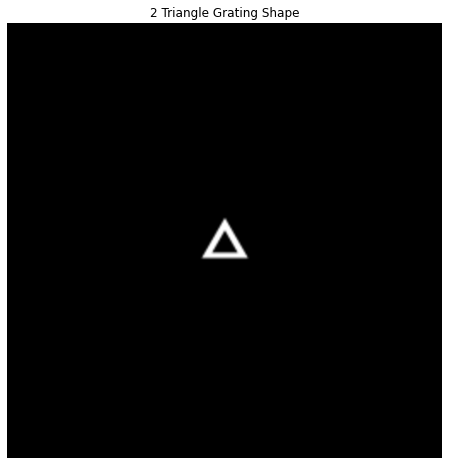

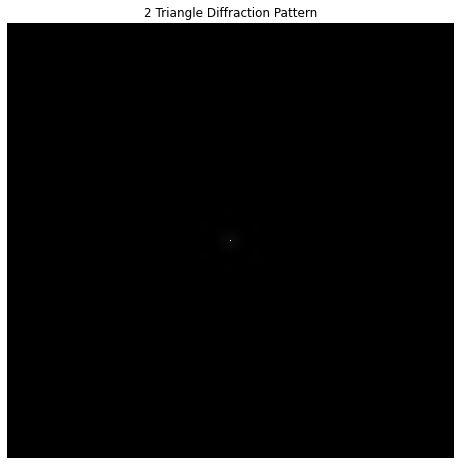

In [2]:
# 2 Triangle
tr2_image = Image.open("tr2.jpg")
tr2_array = np.array(tr2_image).transpose()[0]
tr2_raw, tr2_canvas = np.zeros((4096, 4096)), np.zeros((4096, 4096))
tr2_raw[2048 - 64: 2048 + 64, 2048 - 63: 2048 + 63] = tr2_array
for i in np.arange(4096):
    for j in np.arange(4096):
        tr2_canvas[i][j] = tr2_raw[j][-i]

tr2 = Diffraction(tr2_canvas)
graph(tr2, 256, 1024, "2 Triangle", 0.005)

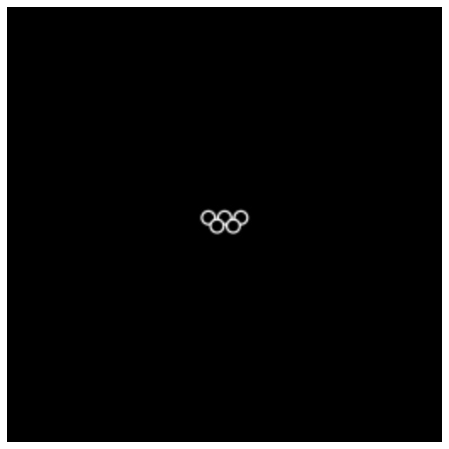

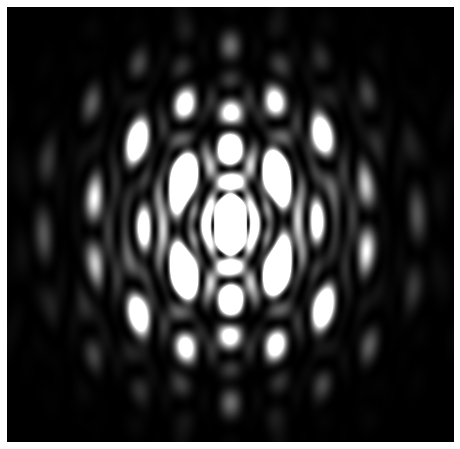

In [4]:
# Olympic
olympic_image = Image.open("olympic.jpg")
olympic_array = np.array(olympic_image).transpose()[0]
olympic_raw, olympic_canvas = np.zeros((4096, 4096)), np.zeros((4096, 4096))
olympic_raw[2048 - 63: 2048 + 63, 2048 - 63: 2048 + 63] = olympic_array
for i in np.arange(4096):
    for j in np.arange(4096):
        olympic_canvas[i][j] = olympic_raw[j][-i]

olympic = Diffraction(olympic_canvas)
plot(olympic, 256, 1024, "Olympic", 0.0000005)

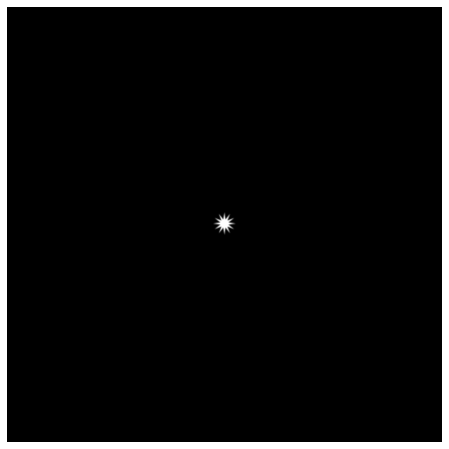

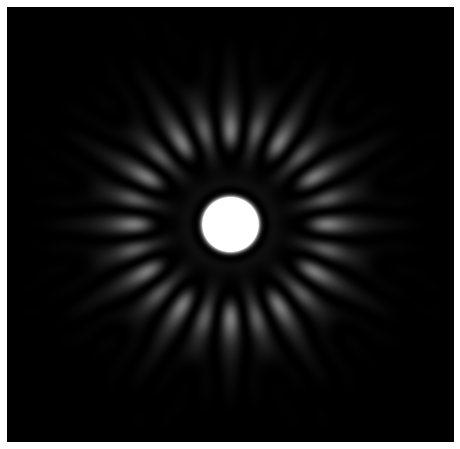

In [5]:
spiky_image = Image.open("spiky.jpg")
spiky_array = np.array(spiky_image).transpose()[0]
spiky_raw, spiky_canvas = np.zeros((4096, 4096)), np.zeros((4096, 4096))
spiky_raw[2048 - 63: 2048 + 63, 2048 - 64: 2048 + 64] = spiky_array
for i in np.arange(4096):
    for j in np.arange(4096):
        spiky_canvas[i][j] = spiky_raw[j][-i]

spiky = Diffraction(spiky_canvas)
plot(spiky, 512, 1024, "Spiky", 0.0000025)

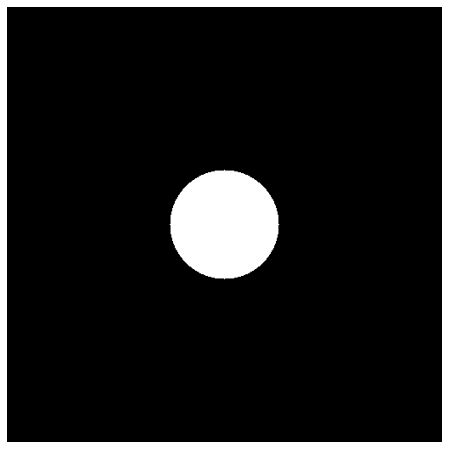

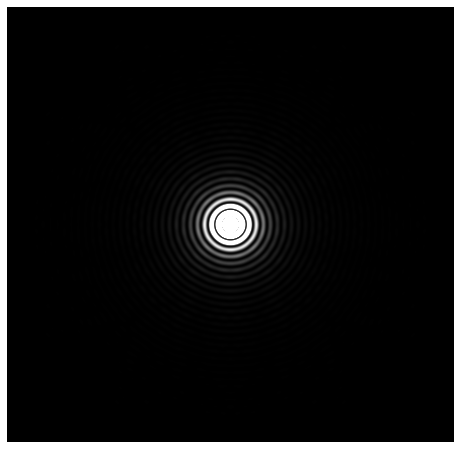

In [6]:
# Circle
circle_canvas = np.zeros((4096, 4096))
for i in np.arange(4096):
    for j in np.arange(4096):
        di = np.abs(i - 2048)
        dj = np.abs(j - 2048)
        d = np.sqrt(di ** 2 + dj ** 2)
        if d <= 64:
            circle_canvas[i][j] = 1

circle = Diffraction(circle_canvas)
plot(circle, 256, 1024, "Circle", 0.000000001)

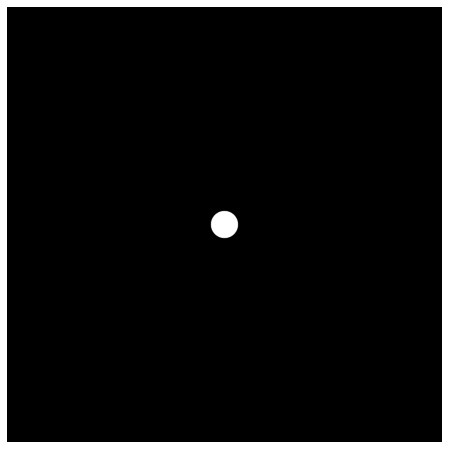

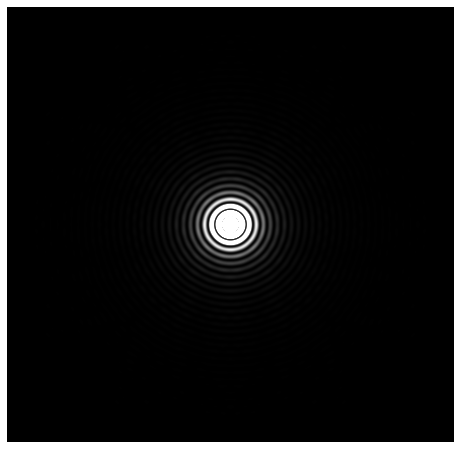

In [45]:
plot(circle, 1024, 1024, "Circle", 0.000000001)

In [32]:
ft_real = np.absolute(fft.fft2(1 - circle.get_grating())) ** 2
intensity = ft_real / np.sqrt(np.sum(ft_real ** 2))
pattern = np.zeros(intensity.shape)

for i in np.arange(pattern.shape[0]):
    for j in np.arange(pattern.shape[1]):
        # Unshift the results of the Fast Fourier Transform
        pattern[i][j] = intensity[(i + pattern.shape[0] // 2) % pattern.shape[0]][(j + pattern.shape[1] // 2) % pattern.shape[1]]

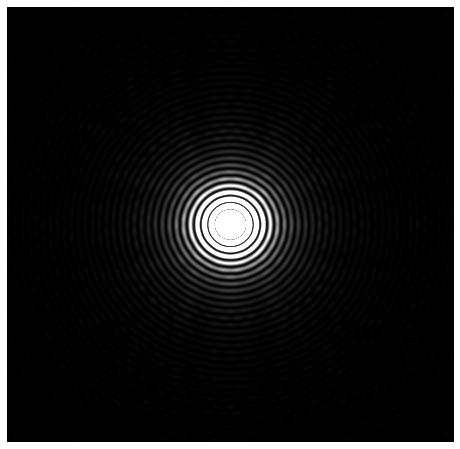

In [39]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
ax.set_xlim(2048 - 1024, 2048 + 1024)
ax.set_ylim(2048 - 1024, 2048 + 1024)
ax.imshow(pattern, cmap="gray", interpolation="bilinear", aspect='auto', vmax=0.00000000025)
ax.set_axis_off()
plt.show()

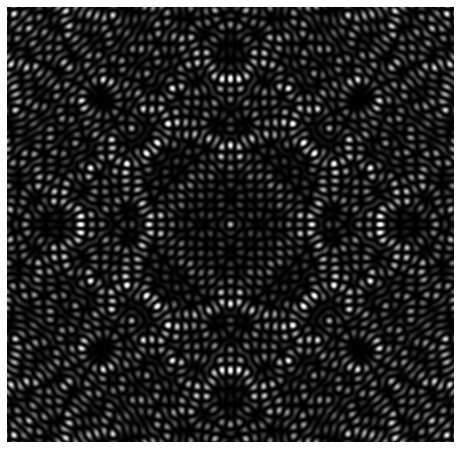

In [44]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
ax.set_xlim(2048 - 1024, 2048 + 1024)
ax.set_ylim(2048 - 1024, 2048 + 1024)
ax.imshow(intensity, cmap="gray", interpolation="bilinear", aspect='auto', vmax=0.000000000002)
ax.set_axis_off()
plt.show()